In [1]:
import sys
sys.path.insert(0, '../util')

from layer import *
from plot import *

from __future__ import division
import random
import math
import numpy as np
import pandas as pd
import time

xy = np.mgrid[-1:1:25j, -1:1:25j].reshape(2,-1).T
xyT = xy.T

sphere = np.array(list(map(lambda x: np.square(x[0]) + np.square(x[1]), xy))).reshape(1,-1)
objective_function = sphere


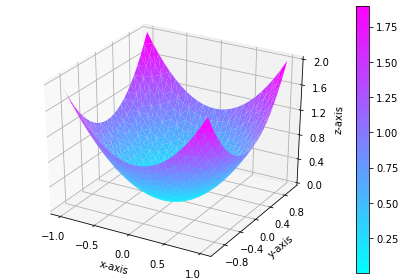

In [2]:
plot_output(xy,sphere, "sphere-original")

In [3]:
global global_best_position
global global_best_cost

class Particle:
    global input_size
    global computational_layer
    global ouput_layer
    global xyT
    
    def __init__(self, dimensions):
        self.position = np.random.random((dimensions,))
        self.dimensions = dimensions
        self.position_bounds = [-20,20]
        self.velocity_bounds = [(self.position_bounds[1]-self.position_bounds[0])/2, -1 * self.position_bounds[1]]
        self.velocity = np.random.random((dimensions,))
        self.best_position = np.random.random((dimensions,))
        self.best_cost, _ = forward_pass_weights_reg(self.best_position,xyT, objective_function ,input_size, computational_layer, output_layer)
        
        self.c = [2.05,2.05]
        self.learning_rate = 0.6
        
    def evaluate(self, cost):
        if(cost<self.best_cost):
            self.best_cost = cost
            self.best_position = self.position
    
    def update_velocity(self):
        self.velocity = self.learning_rate * (self.velocity) + (self.c[0]*random.random()*(self.best_position - self.position)) + (self.c[1]*random.random()*(global_best_position - self.position))
        
    def update_position(self):
        self.position = self.position + self.velocity
        self.position = np.vectorize(lambda z: self.position_bounds[1] if z > self.position_bounds[1] else float(z)) (self.position)
        self.position = np.vectorize(lambda z: self.position_bounds[0] if z < self.position_bounds[0] else float(z)) (self.position)
        

In [4]:
n_iterations = 100
n_population = 150

input_size = 2
computational_layer = 20
output_layer = 1
dimensions = calculate_dimensions(input_size, computational_layer, output_layer)
print(dimensions)

particles = [Particle(dimensions = dimensions) for x in range(n_population)]
global_best_position = np.random.random((dimensions,))
global_best_cost, _ = forward_pass_weights_reg(global_best_position,xyT,objective_function,input_size, computational_layer, output_layer)

cost_list = []

81


In [5]:
start = time.time()

for iteration in range(n_iterations):
    
    for particle in particles:
        particle.update_velocity()
        particle.update_position()

    for particle in particles:
        
        cost, _ = forward_pass_weights_reg(particle.position,xyT, objective_function ,input_size, computational_layer, output_layer)
        
        particle.evaluate(cost)
        if(cost<global_best_cost):
            global_best_cost = cost
            global_best_position = particle.position
        
    cost_list.append(global_best_cost)
    print(iteration)

end = time.time()
print(end - start)

cost, output = forward_pass_weights_reg(global_best_position, xyT, objective_function, input_size, computational_layer, output_layer)
print(cost)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
29.512101888656616
0.00589670602363834


In [6]:
print(reg_cost(objective_function, output))
print(mae(objective_function, output))

0.00589670602363834
0.06259143327732382


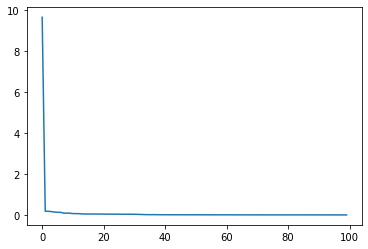

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(n_iterations), y = cost_list)

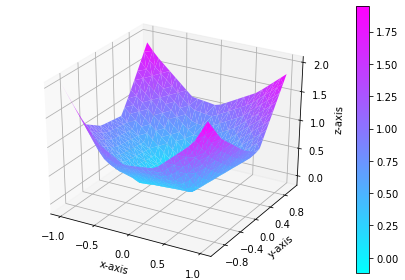

In [8]:
plot_output(xy, output, "Sphere-PSO")

(2, 625)